<a href="https://colab.research.google.com/github/FlyingHirsch96/NN_Gear_Selection/blob/master/LSTM_Stock_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using a Keras LSTM Model to predict stock prices
Based on: https://github.com/mwitiderrick/stockprice.git
This notebook helps me to better understand LSTMs. All credit on the overal design and data goes to Derrick Mwitid.

This LSTM aims to "predict" stock prices based on past price movements.

##Loading the dataset
First mandatory packages are imported. The url with the raw data (hosted by Derrick Mwiti) is 'saved' in the url-variable. Then the datasetTrain is generated by reading the csv-file through the pd.read command. The trainingSet-variable only contains the open and high colummns of the csv-file.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'

datasetTrain = pd.read_csv(url)
trainingSet = datasetTrain.iloc[:, 1:2].values

datasetTrain.head()
testVariable = []
testVariable.append(trainingSet[0, 0])
testVariable = np.array(testVariable)
print(testVariable)

[234.05]


##Feature scaling
Mwitid states, that scaling the data will influence the performance of the LSTM. The MinMaxScaler from Scikit-Learns can normalize the values to numbers between zero and one.

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
trainingSetScaled = sc.fit_transform(trainingSet)

##Creating data with timestemps
LSTMS expect data to be in a array. Lipton et al. give in 'A Critical Review of Recurrent Neural Networks for Sequence Learning' a nice summarization for the expected inputs and outputs for a recurrent neural network resp. a LSTM. To change the input data in a 3D array numpy is used. 

In [0]:
xTrain = []
yTrain = []
for i in range (60, 2035):
  xTrain.append(trainingSetScaled[i-60:i, 0])
  yTrain.append(trainingSetScaled[i, 0])
xTrain, yTrain = np.array(xTrain), np.array(yTrain)

xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))

###Some prints for data evaluation an better understanding
xTrain is a 3D array (thanks to the np.reshape) with 1975 vectors each consisting of 60 timesteps. The overal size of the array is therfore 60*1975=118500. yTrain is a 1D array consisting of 1975 different values.

Therfore a sequence of 60 timesteps from xTrain is given as an input for the LSTM and the corresponding value of yTrain is given as the desired output.


In [4]:
print("xTrain:", xTrain)
print("xTrain ndim:", xTrain.ndim)
print("xTrain shape:", xTrain.shape)
print("xTrain size:", xTrain.size)
print("xTrain[1] size:", xTrain[1].size)
print("xTrain[2] size:", xTrain[2].size)
print("yTrain:", yTrain)
print("yTrain ndim:", yTrain.ndim)
print("yTrain size:", yTrain.size)

xTrain: [[[0.6202352 ]
  [0.62226277]
  [0.64436334]
  ...
  [0.79622871]
  [0.81062449]
  [0.74371452]]

 [[0.62226277]
  [0.64436334]
  [0.61719384]
  ...
  [0.81062449]
  [0.74371452]
  [0.77007299]]

 [[0.64436334]
  [0.61719384]
  [0.61820762]
  ...
  [0.74371452]
  [0.77007299]
  [0.73641525]]

 ...

 [[0.19870235]
  [0.21796431]
  [0.21553122]
  ...
  [0.14963504]
  [0.14801298]
  [0.15815085]]

 [[0.21796431]
  [0.21553122]
  [0.20600162]
  ...
  [0.14801298]
  [0.15815085]
  [0.16504461]]

 [[0.21553122]
  [0.20600162]
  [0.21654501]
  ...
  [0.15815085]
  [0.16504461]
  [0.15896188]]]
xTrain ndim: 3
xTrain shape: (1975, 60, 1)
xTrain size: 118500
xTrain[1] size: 60
xTrain[2] size: 60
yTrain: [0.77007299 0.73641525 0.73763179 ... 0.16504461 0.15896188 0.16626115]
yTrain ndim: 1
yTrain size: 1975


##Building the LSTM

To build the LSTM a few modules from Keras are necessary.


1.   Sequential is for initalizing the neural network.
2.   Dense for adding a densely connected neural network layer.
3.   LSTM for adding the LSTM layer(s).
4.   Dropout for adding dropout layers that prevent overfitting.







In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


First, the model *stockPricePredictor* is initialized. 

After this, four LSTM layers are added to the model. Each of the LSTM layer consist of 50 units, which means, that the output space of the layer will be 50. The statement return_sequences of the LSTM-layer decides, whether the output of the LSTM is the last output, or the full sequence. The latter is the case, if the statement is true. The statement input_shape 'tells' the LSTM-layer the shape/size of the input sequence.

Between every LSTM-layer is a dropout. Dropout consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting, as stated in the Keras documentation. A dropout rate of 0.2 means that 20% of the output is set to zero.

After the LSTM-layers is a dense layer. A dense layer is a regular layer of a neural network with the special feature of having each neuron in the dense layer connected to each neuron of the previous layer. Dense layers a typical classifiation layers. Two important arguments of the dense layer are the number of units and the activation function. The number of units are set to one for this example, mostly because there is one output wanted for the whole sequence, which is the last open value of the stock in the input sequence. Because of the not further specified activation function, a linear activation y(x)=x is used as the activation of the neurons in the layer.

The dense layer is the last layer of the neural network. It is then compiled, which means, that it is configured for training. Here get arguments like the used optimizer or the loss function set.

After configuring the net for training, it is trained with the fit-command. Here the arguments input (xTrain), output (yTrain), epochs (100) and the batch_size (32) are set. That means that as input xTrain is used. For every Epochs, 32 sequences of xTrain are used, which should mean, that some sequences get trained double, because 32*100>1975.





In [7]:
stockPricePredictor = Sequential()

stockPricePredictor.add(LSTM(units=50, return_sequences=True, input_shape = (xTrain.shape[1], 1)))
stockPricePredictor.add(Dropout(0.2))

stockPricePredictor.add(LSTM(units=50, return_sequences=True))
stockPricePredictor.add(Dropout(0.2))

stockPricePredictor.add(LSTM(units=50, return_sequences=True))
stockPricePredictor.add(Dropout(0.2))

stockPricePredictor.add(LSTM(units=50))
stockPricePredictor.add(Dropout(0.2))

stockPricePredictor.add(Dense(units=1))

stockPricePredictor.compile(optimizer='adam', loss='mean_squared_error')

stockPricePredictor.fit(xTrain, yTrain, epochs=100, batch_size=32)

Epoch 1/100
1975/1975 [==============================] - 10s 5ms/step - loss: 0.0086
Epoch 2/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0029
Epoch 3/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0032
Epoch 4/100
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0025
Epoch 5/100
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0027
Epoch 6/100
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0023
Epoch 7/100
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0020
Epoch 8/100
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0018
Epoch 9/100
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0019
Epoch 10/100
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0020
Epoch 11/100
1975/1975 [==============================] - 9s 4ms/step - loss: 0.0019
Epoch 12/100
1975/1975 [==============================] - 9s 4ms/step - l

###Conlusion of training

As can be seen, the loss of the neural network gradualy decreased over time, meaning the performance resp. the accuracy of the net getting better. At epoch 38 the loss hits a plateu and fluctuates around 7.0e-04.

##Predicting future stock using the test set
The test set (hosted by Derrick Mwitid) get's imported just like the training set before.

In [0]:
datasetTest = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv')
realStockPrice = datasetTest.iloc[:, 1:2].values

To predict future stock prices, there are the following preparatory things to load:


1.   Merging training and test set on the 0 axis.
2.   Set the time steps as 60 (as seen previously).
3.   Normalize the input with MinMaxScaler.
4.   Reshape the dataset to a 3D array.



In [0]:
datasetTotal = pd.concat((datasetTrain['Open'], datasetTest['Open']), axis = 0)
inputs = datasetTotal[len(datasetTotal)-len(datasetTest)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
xTest = []
for i in range(60, 76):
  xTest.append(inputs[i-60:i, 0])
xTest = np.array(xTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))

The prediction gets saved in the variable predictetdStockPrice. The prediction is made by using the predict method on the trained model. After that, the normalized predictions get inversed to a normal readable format.

In [0]:
predictedStockPrice = stockPricePredictor.predict(xTest)
predictedStockPrice = sc.inverse_transform(predictedStockPrice)

##Plotting the Results
The results get plotted by using methods from Matplotlib.

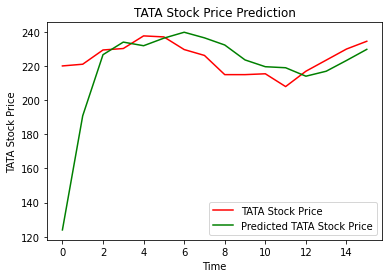

In [14]:
plt.plot(realStockPrice, color = 'red', label = 'TATA Stock Price')
plt.plot(predictedStockPrice, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()

#Conclusion

The LSTM RNN got trained to 'predict' a stock price, based on past stock prices. While the LSTM RNN definitely performs quite accurate, as seen in the graph above, the word 'prediction' should not be understoold literally. While there definetly is a prediction of values, all of them are past stock prices. The RNN can only predict the most recent stock price and is not able to realy compute a stock price in the actual future. This shows, that deep learning is not particularly used for 'predicting the future' but for pattern recognition. 

The slope at the beginning of the graph is most likely based on the inputs and outputs an how they are used to train the RNN. At first a sequence of 60 values get inputted one after another in the neural net. 